<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD2_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : Génération de Données et Estimastion du Classifieur de Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats

np.random.seed(407)

## Exercice 1. Générations de données par densité Gaussienne et classifieur de Bayes

L'objectif de cet exercice est de déterminer le classifieur de Bayes permettant de diagnostiquer une maladie à partir d'une seule variable : la température d'un patient. Pour la suite, la classe 1 caractérisera les patients sains et la classe 2 caractérisera les patients malades.

- On considèrera que la densité de distribution caractérisant les patients sains est une Gaussienne de moyenne $\mu_1$ et de variance $\sigma_1^2$.
- De même, on considèrera que la densité de distribution caractérisant les patients malades est une Gaussienne de moyenne $\mu_2$ et de variance $\sigma_2^2$.

Autrement dit, pour chaque classe $k\in\{1,2\}$, on a 
\begin{equation}
f_k(x) = \frac{1}{\sigma_k \sqrt{2\pi}} \, \mathrm{exp}\left( -\frac{(x-\mu_k)^2}{2\sigma_k^2}\right).
\end{equation}


### Question 1 : Générations d'une base d'apprentissage 

L'objectif de cette question est de générer aléatoirement une base d'apprentissage à partir des densités de distributions de chaque classe. 
Pour la suite, $X_i$ caractérisera la variable aléatoire caractérisant la température (le profile) d'un patient $i$, et $Y_i$ la variable aléatoire caractérisant sa classe.
De même, on considèrera que la probabilité à priori qu'un patient soit malade est égale à $p := \mathbb{P}(Y_i = 2)$.


- **Probabilités de générer un patient dans chaque classe**
    1. Déterminer analytiquement la fonction de densité de distribution $f_X(x)$ de la variable aléatoire $X$ en fonction de $p$, $f_1(x)$  et $f_2(x)$.
    2. Déterminer ensuite analytiquement la probabilité qu'un patient $i$ soit sain sachant que sa température est $X_i = x_i$. 
    De même, déterminer analytiquement la probabilité qu'un patient $i$ soit malade sachant que sa température est $X_i = x_i$.
    
  *Réponses aux questions 1. et 2.* 
    1. Puisque que la variable aléatoire $Y$ est une variable aléatoire discrète à 2 issues telle que $\mathbb{P}(Y_i = 2) = p$, il s'en suit que $\mathbb{P}(Y_i = 1) = 1-p$ (cf loi de Bernouilli).
> D'après la formule des probabilités totales, on a
> $$ \begin{aligned}
f_{X}(x) & \;=\; f_1(x) \, \mathbb{P}(Y=1)  + f_2(x)  \,\mathbb{P}(Y=2) \\
& \;=\; (1-p) f_1(x)  + p f_2(x) .
\end{aligned}
$$

  2. D'après la formule de Bayes, la probabilité qu'un patient $i$ soit sain sachant qu'il a une température $X_i = x_i$ est 
> $$
\begin{aligned}
\mathbb{P}(Y_i=1|X_i=x_i)  \;=\; \frac{\mathbb{P}(Y_i=1)f_1(x_i)}{f_{X}(x_i)} 
 \;=\; \frac{(1-p) \, f_{1}(x_i)}{(1-p) f_1(x_i)  + p f_2(x_i) } .
\end{aligned}
$$
> De plus, la probabilité qu'un patient $i$ soit malade sachant qu'il a une température $X_i = x_i$ est 
> $$
\begin{aligned}
\mathbb{P}(Y_i=2|X_i=x_i)  \;=\; \frac{\mathbb{P}(Y_i=2)f_2(x_i)}{f_{X}(x_i)} 
 \;=\; \frac{p \, f_{2}(x_i)}{(1-p) f_1(x_i)  + p f_2(x_i) } .
\end{aligned}
$$



    

- **Génération de la base de données simulée**
    
     On considère dans cette question que les paramètres des deux lois gaussiennes sont donnés par $\mu_1 = 37.8$, $\mu_2 = 39$, $\sigma_1 = 0.4$, $\sigma_2 = 0.2$. On considère également que la probabilité à priori qu'un patient soit malade est égale à $p = \mathbb{P}(Y_i = 2) = 0.2$.

    - À partir de la variable aléatoire température, générer $m_1 = 80$ patients dans la classe 1 et $m_2 = 20$ patients dans la classe 2. Pour chaque patient de la classe 1, le profile $X_i$ sera généré aléatoirement suivant la loi $\mathcal{N}\left(\mu_1,\sigma_1^2\right)$. Pour chaque patient de la classe 2, le profile $X_i$ sera généré aléatoirement suivant la loi $\mathcal{N}\left(\mu_2,\sigma_2^2\right)$
    - Tracer les fonctions de densité $f_1(x)$ et $f_2(x)$ sur une même figure.
    - Afficher l'ensemble des patients sur cette même figure (sur l'axe des abscisses) de sorte que l'on visualise bien ceux de la classe 1 et ceux de la classe 2.

Pour la suite, cette base de données que nous venons de générer correspondra à notre base d'apprentissage, qui a été générée à partir des paramètres $\mu_1, \mu_2, \sigma_1, \sigma_2$ connus.

In [2]:
# RÉPONSE À LA QUESTION:
np.random.seed(407)
mu1 = 37.8
mu2 = 39
sig1 = 0.4
sig2 = 0.2
m1 = 80
m2 = 20

Xi_Classe1 = np.random.normal(mu1, sig1, m1)
Xi_Classe2 = np.random.normal(mu2, sig2, m2)


In [4]:
Xi_Classe1.shape

(80,)

In [5]:
Xi_Classe2

array([39.14566854, 39.16992421, 38.64079964, 38.82083859, 39.06797417,
       38.98402458, 38.77884759, 38.8072751 , 39.0283102 , 39.1167189 ,
       39.1213237 , 38.91929485, 38.87576257, 39.04599402, 39.01928962,
       39.21068097, 38.94329329, 38.90997317, 38.94392841, 39.1367613 ])

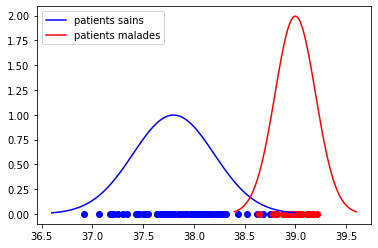

In [14]:
fx1 = np.linspace(mu1 - 3*sig1, mu1 + 3*sig1, 100)
fx2 = np.linspace(mu2 - 3*sig2, mu2 + 3*sig2, 100)
plt.plot(fx1, stats.norm.pdf(fx1, mu1, sig1), c='blue', label='patients sains')
plt.plot(fx2, stats.norm.pdf(fx2, mu2, sig2), c='red', label='patients malades')
plt.scatter(Xi_Classe1, np.zeros(m1), c='blue')
plt.scatter(Xi_Classe2, np.zeros(m2), c='red')
plt.legend()
plt.show()

### Question 2 : Classifieur de Bayes théorique 

L'objectif de cette question est maintenant de déterminer le classifieur de Bayes théorique, c'est à dire le classifieur optimal qui diagnostiquera au mieux les patients de la classe 1 et de la classe 2 lorsque les paramètres $p, \mu_1, \mu_2, \sigma_1, \sigma_2$ sont connus.  

1. Determiner une regle de décision permettant de diagnostiquer au mieux les patients sains ainsi que les patients malades en fonction de la température. Écrire analytiquement cette règle de décision. 
2. Implémenter une fonction calculant ce classifieur de Bayes théorique et appliquer ensuite ce classifieur sur la base d'apprentissage générée dans la question précédente. Calculer ensuite le taux d'erreur global ainsi que les taux d'erreurs moyens obtenu par ce classifieur de Bayes théorique. 


- **Réponse à la Question 2.**

    1. d'après la question 1, on a :
$$
\begin{aligned}
\mathbb{P}(Y_i=1|X_i=x_i)  \;=\; \frac{\mathbb{P}(Y_i=1)f_1(x_i)}{f_{X}(x_i)} 
 \;=\; \frac{(1-p) \, f_{1}(x_i)}{(1-p) f_1(x_i)  + p f_2(x_i) } .
\end{aligned}
$$
et 
$$
\begin{aligned}
\mathbb{P}(Y_i=2|X_i=x_i)  \;=\; \frac{\mathbb{P}(Y_i=2)f_2(x_i)}{f_{X}(x_i)} 
 \;=\; \frac{p \, f_{2}(x_i)}{(1-p) f_1(x_i)  + p f_2(x_i) } .
\end{aligned}
$$

Puisque dans cette question les paramètres $p, \mu_1, \mu_2, \sigma_1, \sigma_2$ sont supposés connus, il nous est alors possible de calculer explicitement 

$\mathbb{P}(Y_i=1|X_i=x_i)$ et $\mathbb{P}(Y_i=2|X_i=x_i)$ pour chaque valeur de $x_i$. 

Le classifieur de Bayes (que l'on nottera $\delta^B$) attribuera à chaque profile $x_i$ la classe $Y_i\in\{1,2\}$ qui a la plus grande probabilité de se réaliser sachant le profile $x_i$. 
        Autrement dit :
$$
        \begin{aligned}
        \delta^B : x_i \mapsto \mathrm{argmax}_{k\in\{1,2\}} \; \mathbb{P}(Y_i=k|X_i=x_i).
        \end{aligned}
$$

In [ ]:
# RÉPONSE À LA QUESTION 2.2:



### Question 3 : Classifieur de Bayes Empirique 

Rappelons que l'objectif de la première question était de générer une base de données à partir de distributions connues. Ensuite, l'objectif de la question 2 était de déterminer le classifieur de Bayes théorique (le classifieur optimal par rapport aux densités de probabilités issues de la question 1).

En pratique dans la vraie vie, nous diposons seulement des observations issues de la base d'apprentissage, mais nous n'avons en général aucune connaissance concernant les densités de probabilités dans chaque classe. À partir de cette base d'apprentissagen l'objectif est alors d'apprendre un classifieur qui convergera vers le classifieur de Bayes optimal.

Pour cette question, nous supposons donc maintenant que nous disposons seulement de notre base d'apprentissage (températures des 100 patients ainsi que leur classe) générée lors de la question 1.
Nous supposons également que la probabilité à priori $p$ ainsi que les densités $f_1(x)$, $f_2(x)$ sont toutes maintenant inconnues. Nous supposerons tout de même que la loi de $X$ est une Gaussienne dans chaque classe, mais que 
les paramètres $p, \mu_1, \mu_2, \sigma_1, \sigma_2$ sont maintenant inconnus.


1. Comment procèderiez-vous pour apprendre une regle de décision permettant de diagnostiquer au mieux les patients sains ainsi que les patients malades en fonction de la température et en essayant d'approximer le classifier de Bayes ? 

2. Implémenter une fonction apprenant ce classifieur sur la base d'apprentissage générée dans la question 1. Calculer ensuite le taux d'erreur global ainsi que les taux d'erreurs par classe obtenus par ce nouveau classifieur et comparer les résultats avec ceux obtenus par le classifieur de Bayes théorique. 

3. Générer une base de données test (de façon similaire à la question 1) contenant 1000 observations (800 dans la classe 1 et 200 dans la classe 2). Comparer ensuite les performances du classifieur de Bayes théorique et du classifieur de Bayes empirique sur cette nouvelle base de données test.


- **Réponse à la Question 3.1**

    1. ...
 
         

In [ ]:
# RÉPONSE À LA QUESTION 3.2:



In [ ]:
# RÉPONSE À LA QUESTION 3.3:
np.random.seed(407)



## Exercice 2. Cas de plusieurs variables Gaussiennes